In [152]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil

label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.color_cycle'] = ['#f79321', '#285fa7']#, '#215D74']

In [153]:
def yaml_loader(filepath):
    """Reads in yaml files"""
    with open(filepath,"r") as file_descriptor:
        data = yaml.load(file_descriptor)
    return data

def load_property(dictionary,prop):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(dictionary['thermal_properties'])):
        new_list.append(dictionary['thermal_properties'][i][prop])
    return new_list

def load_disp(filepath):
    gibbs = []
    with open(filepath,'r') as f:
        data = f.readlines()
        for line in data:
            inp = line.split()
            inp = [float(i) for i in inp]
            gibbs.append(inp)
        gibbs = np.asarray(gibbs)
    return gibbs

In [154]:
p21_displacements = load_disp('OrganicAB/P2121-Ellipse_Temp.dat')
p21_displacements_h = load_disp('OrganicAB/P2121-h_Ellipse_Temp.dat')

pna_displacements = load_disp('OrganicAB/Pna21-Ellipse_Temp.dat')
pna_displacements_h = load_disp('OrganicAB/Pna21-h_Ellipse_Temp.dat')

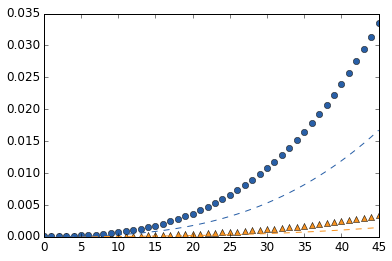

In [155]:
plt.plot(pna_displacements_h[:,1],'^')
plt.plot(p21_displacements_h[:,1],'o')
plt.plot(pna_displacements[:,1],'--')
plt.plot(p21_displacements[:,1],'--')

In [156]:
sto_cubic_displacements = load_disp('STO/cubic_Ellipse_Temp.dat')

sto_tet_displacements = load_disp('STO/tet_Ellipse_Temp.dat')

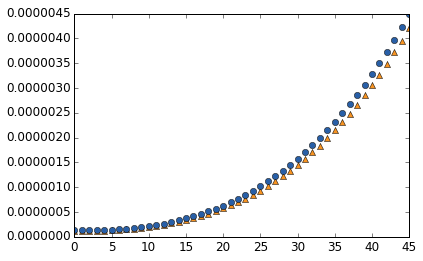

In [157]:
plt.plot(sto_tet_displacements[:,1],'^')
plt.plot(sto_cubic_displacements[:,1],'o')

In [158]:
bh4_cubic_displacements = load_disp('OrganicB/cubic_Ellipse_Temp.dat')
bh4_cubic_displacements_h = load_disp('OrganicB/cubic_h_Ellipse_Temp.dat')

bh4_ortho_displacements = load_disp('OrganicB/ground_Ellipse_Temp.dat')
bh4_ortho_displacements_h = load_disp('OrganicB/ground_h_Ellipse_Temp.dat')

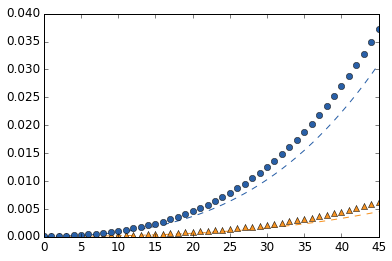

In [159]:
plt.plot(bh4_ortho_displacements[:,1],'--')
plt.plot(bh4_cubic_displacements[:,1],'--')

plt.plot(bh4_ortho_displacements_h[:,1],'^')
plt.plot(bh4_cubic_displacements_h[:,1],'o')

In [160]:
mapi_tet_displacements = load_disp('OrganicA/tet_Ellipse_Temp.dat')
mapi_tet_displacements_h = load_disp('OrganicA/tet_h_Ellipse_Temp.dat')

mapi_cubic_displacements = load_disp('OrganicA/cubic_Ellipse_Temp.dat')
mapi_cubic_displacements_h = load_disp('OrganicA/cubic_h_Ellipse_Temp.dat')

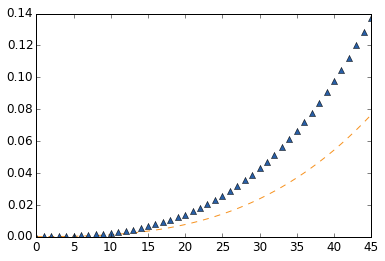

In [161]:
plt.plot(mapi_cubic_displacements[:,1],'--')
plt.plot(mapi_cubic_displacements_h[:,1],'^')

In [166]:
temp = np.arange(0,460,10)
print temp

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450]


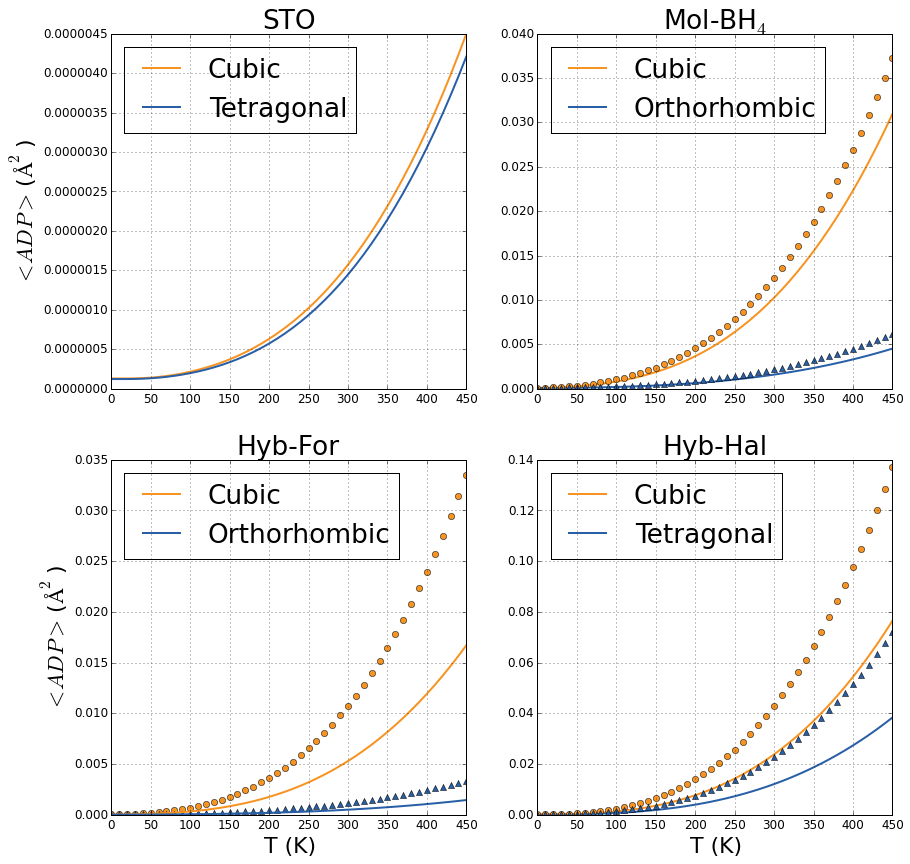

In [173]:
f, ax = plt.subplots(2, 2, sharex=False)
f.set_size_inches(14,14)

ax[0,0].set_title('STO')
ax[0,0].plot(temp,sto_cubic_displacements[:,1],'-',label='Cubic',lw=2)
ax[0,0].plot(temp,sto_tet_displacements[:,1],'-',label='Tetragonal',lw=2)

ax[0,1].set_title('Mol-BH$_4$')
ax[0,1].plot(temp,bh4_cubic_displacements[:,1],'-',label='Cubic',lw=2)
ax[0,1].plot(temp,bh4_ortho_displacements[:,1],'-',label='Orthorhombic',lw=2)
ax[0,1].plot(temp,bh4_cubic_displacements_h[:,1],'o')
ax[0,1].plot(temp,bh4_ortho_displacements_h[:,1],'^')

ax[1,0].set_title('Hyb-For')
ax[1,0].plot(temp,p21_displacements_h[:,1],'o')
ax[1,0].plot(temp,pna_displacements_h[:,1],'^')
ax[1,0].plot(temp,p21_displacements[:,1],'-',label='Cubic',lw=2)
ax[1,0].plot(temp,pna_displacements[:,1],'-',label='Orthorhombic',lw=2)


ax[1,1].set_title('Hyb-Hal')
ax[1,1].plot(temp,mapi_cubic_displacements[:,1],'-',lw=2,label='Cubic')
ax[1,1].plot(temp,mapi_tet_displacements[:,1],'-',lw=2,label='Tetragonal')
ax[1,1].plot(temp,mapi_cubic_displacements_h[:,1],'o')
ax[1,1].plot(temp,mapi_tet_displacements_h[:,1],'^')

ax[0,0].set_ylabel('$< ADP >$ ($\AA^2$)')
ax[1,0].set_ylabel('$< ADP >$ ($\AA^2$)')
ax[1,0].set_xlabel('T (K)')
ax[1,1].set_xlabel('T (K)')

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].legend(loc='upper left')
        
plt.savefig('Ellipse.jpg')